Project Title: "Development and Training of Convolutional Neural Networks for Image Classification using CIFAR-10 Dataset"
Problem Statement:
How can we design, implement, and optimize Convolutional Neural Networks (CNNs) to effectively classify images from the CIFAR-10 dataset, and compare the performance of various network architectures including single-layer CNNs, deeper CNNs, LeNet, and an enhanced LeNet with ReLU activations?

Files already downloaded and verified
Files already downloaded and verified
torch.Size([128, 3, 32, 32])


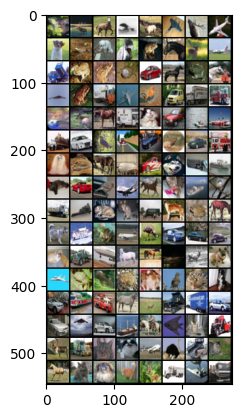

torch.Size([128, 16, 16, 16])
torch.Size([16, 3, 3, 3])
torch.Size([16])


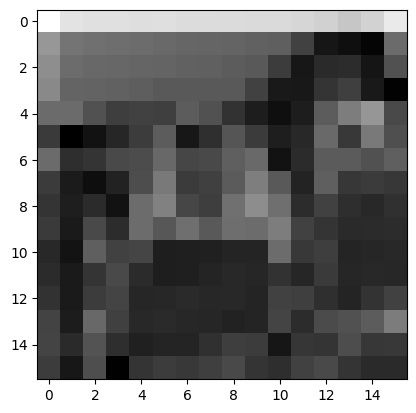

torch.Size([128, 16, 28, 28])
torch.Size([8, 3, 3, 3])
torch.Size([8])
torch.Size([16, 8, 3, 3])
torch.Size([16])


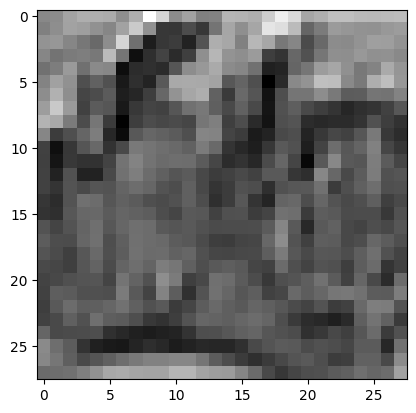

torch.Size([128, 16, 5, 5])
torch.Size([6, 3, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])


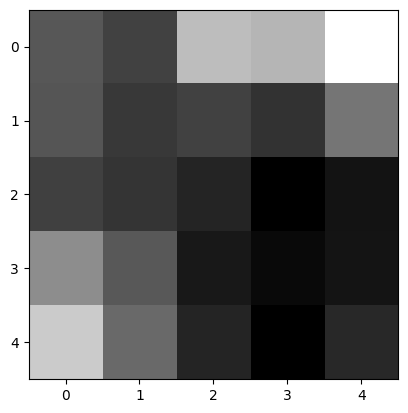

Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16


In [1]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Install torchvision if not already installed
!pip install torchvision

class CNNProject:
    def __init__(self):
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.batch_size = 128
        self.max_epochs = 16

        self.trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                     download=True,
                                                     transform=transforms.ToTensor())
        self.trainloader = torch.utils.data.DataLoader(self.trainset, batch_size=self.batch_size, shuffle=True)

        self.testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                                    download=True,
                                                    transform=transforms.ToTensor())
        self.testloader = torch.utils.data.DataLoader(self.testset, batch_size=self.batch_size, shuffle=False)

    def imshow(self, img):
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

    class FirstCNN(nn.Module):
        def __init__(self):
            super(CNNProject.FirstCNN, self).__init__()
            self.conv1 = nn.Conv2d(3, 16, 3, padding=(1, 1), stride=(2, 2))

        def forward(self, x):
            x = self.conv1(x)
            return x

    class FirstCNN_v2(nn.Module):
        def __init__(self):
            super(CNNProject.FirstCNN_v2, self).__init__()
            self.model = nn.Sequential(
                nn.Conv2d(3, 8, 3),
                nn.Conv2d(8, 16, 3)
            )

        def forward(self, x):
            x = self.model(x)
            return x

    class FirstCNN_v3(nn.Module):
        def __init__(self):
            super(CNNProject.FirstCNN_v3, self).__init__()
            self.model = nn.Sequential(
                nn.Conv2d(3, 6, 5),
                nn.AvgPool2d(2, stride=2),
                nn.Conv2d(6, 16, 5),
                nn.AvgPool2d(2, stride=2)
            )

        def forward(self, x):
            x = self.model(x)
            return x

    class LeNet(nn.Module):
        def __init__(self):
            super(CNNProject.LeNet, self).__init__()
            self.cnn_model = nn.Sequential(
                nn.Conv2d(3, 6, 5),
                nn.Tanh(),
                nn.AvgPool2d(2, stride=2),
                nn.Conv2d(6, 16, 5),
                nn.Tanh(),
                nn.AvgPool2d(2, stride=2)
            )

            self.fc_model = nn.Sequential(
                nn.Linear(400, 120),
                nn.Tanh(),
                nn.Linear(120, 84),
                nn.Tanh(),
                nn.Linear(84, 10)
            )

        def forward(self, x):
            x = self.cnn_model(x)
            x = x.view(x.size(0), -1)
            x = self.fc_model(x)
            return x

    class LeNet_ReLU(nn.Module):
        def __init__(self):
            super(CNNProject.LeNet_ReLU, self).__init__()
            self.cnn_model = nn.Sequential(
                nn.Conv2d(3, 6, 5),
                nn.ReLU(),
                nn.AvgPool2d(2, stride=2),
                nn.Conv2d(6, 16, 5),
                nn.ReLU(),
                nn.AvgPool2d(2, stride=2)
            )

            self.fc_model = nn.Sequential(
                nn.Linear(400, 120),
                nn.ReLU(),
                nn.Linear(120, 84),
                nn.ReLU(),
                nn.Linear(84, 10)
            )

        def forward(self, x):
            x = self.cnn_model(x)
            x = x.view(x.size(0), -1)
            x = self.fc_model(x)
            return x

    def visualize_data(self):
        dataiter = iter(self.trainloader)
        images, labels = next(dataiter)
        print(images.shape)
        self.imshow(torchvision.utils.make_grid(images))

    def test_model(self, model):
        dataiter = iter(self.trainloader)
        images, labels = next(dataiter)
        out = model(images)
        print(out.shape)
        for param in model.parameters():
            print(param.shape)
        plt.imshow(out[0, 0, :, :].detach().numpy(), cmap='gray')
        plt.show()

    def train_and_evaluate(self, net):
        net = net.to(self.device)
        loss_fn = nn.CrossEntropyLoss()
        opt = optim.Adam(net.parameters(), weight_decay=0.01)

        for epoch in range(self.max_epochs):
            for i, data in enumerate(self.trainloader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                opt.zero_grad()
                outputs = net(inputs)
                loss = loss_fn(outputs, labels)
                loss.backward()
                opt.step()

            print('Epoch: %d/%d' % (epoch + 1, self.max_epochs))

        print('Test acc: %0.2f, Train acc: %0.2f' % (self.evaluation(self.testloader, net), self.evaluation(self.trainloader, net)))

    def evaluation(self, dataloader, net):
        total, correct = 0, 0
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            outputs = net(inputs)
            _, pred = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (pred == labels).sum().item()
        return 100 * correct / total

    def basic_visualization(self, net):
        dataiter = iter(self.trainloader)
        images, labels = next(dataiter)
        self.imshow(torchvision.utils.make_grid(images))

        net = net.to('cpu')
        out = net(images)
        print(out.shape)

        out = net.cnn_model[0](images)
        print(out.shape)

        image_id = 3
        plt.figure(figsize=(2, 2))
        self.imshow(images[image_id])

        plt.figure(figsize=(6, 6))
        for i in range(6):
            plt.subplot(3, 2, i + 1)
            plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap='binary')
        plt.show()

# Instantiate and use the class
project = CNNProject()
project.visualize_data()

# Test single convolution layer model
net = project.FirstCNN()
project.test_model(net)

# Test deep convolution network
net = project.FirstCNN_v2()
project.test_model(net)

net = project.FirstCNN_v3()
project.test_model(net)

# Test and train LeNet
net = project.LeNet()
project.train_and_evaluate(net)

# Test and train LeNet with ReLU
net = project.LeNet_ReLU()
project.train_and_evaluate(net)

# Visualize results
project.basic_visualization(net)
